# This is an implementation for computing Collision Free Regions in Configuration Space using IRIS

[IRIS in Configuration Space](https://drake.mit.edu/doxygen_cxx/group__geometry__optimization.html#ga3a51e0fec449a0abcf498f78a2a390a8)


This notebook contains code for creating, visualizing and saving such regions.

In [ ]:
!pip install drake pyngrok


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os.path
import sys
import numpy as np

from pyngrok import ngrok

from pydrake.geometry import ( StartMeshcat )
from pydrake.geometry.optimization import ( SaveIrisRegionsYamlFile)

# Update the import
sys.path.append("/content/drive/MyDrive/proyecto_modular/autonomous-manipulation")
from src.manipulation import running_as_notebook
from src.auxiliar.auxiliar_functions import (VisualizeConnectivity)
from src.auxiliar.homemade_gcs import GcsTrajOpt
from src.auxiliar.iris_options import create_iris_options
from src.auxiliar.joint_teleop import JointTeleop
from src.auxiliar.helper import VisualizeRegions

In [ ]:
# Start the visualizer (only run this once).
meshcat = StartMeshcat()


In [ ]:
# Create a tunnel to the Meshcat server
ngrok.set_auth_token("2rdws4UBYTqZ1NiiyEbJcWRnByV_7D9Jg8K3YVyZzbFMN1ysg")
public_url = ngrok.connect(7000, "http")
print(f"Meshcat is accessible at: {public_url}")

# Setup



In [ ]:
iris_filename = "/content/drive/MyDrive/proyecto_modular/autonomous-manipulation/data/my_iris.yaml" # The file to save the regions to
iris_regions = dict() # The regions that we will compute
q = []

iris_options, config = create_iris_options() # Create the options for the iris algorithm

## Run IRIS on manually-specified seeds

In [ ]:
# VisualizeRegion("Top Rack")
print(config["iris_regions"].keys())
iris_regions = config["iris_regions"]
VisualizeRegions(meshcat, iris_regions, config)

dict_keys([])


## Joint Teleop

In [9]:
# clear the meshcat visualizer
meshcat.Delete()
meshcat.DeleteAddedControls()

seeds_joint_teleop = []
JointTeleop(meshcat, seeds_joint_teleop, config["iris_regions"], config, q)

Press the 'Stop Joint Teleop' button in Meshcat to continue or press 'Escape'


'Computing region for seed: JointTeleopRegion0'

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake:IrisInConfigurationSpace: terminating iterations because the seed point is no longer in the region.


'Finished seed JointTeleopRegion0; Computation time: 5.10 seconds'

'Computing region for seed: JointTeleopRegion1'

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake:IrisInConfigurationSpace iteration 2
INFO:drake:IrisInConfigurationSpace iteration 3
INFO:drake:IrisInConfigurationSpace iteration 4
INFO:drake:IrisInConfigurationSpace iteration 5
INFO:drake:IrisInConfigurationSpace iteration 6
INFO:drake:IrisInConfigurationSpace iteration 7
INFO:drake:IrisInConfigurationSpace: Terminating because the hyperellipsoid relative volume change 0.002994088523189715 is below the threshold 0.01.


'Finished seed JointTeleopRegion1; Computation time: 86.43 seconds'

## Visualize the current IRIS region connectivity

For planning trajectories, it's important to have some non-empty intersection between the convex sets. Here is a simple utility the visualization the connectivity as a graph.

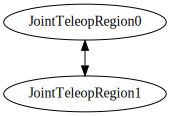

In [14]:
VisualizeConnectivity(config['iris_regions'])

In [13]:
print(seeds_joint_teleop)

[array([ 1.24, -1.22, -1.16,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]), array([-1.57, -1.22, -1.16,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])]


## Plan trajectories with GCS Trajectory Optimization

In [12]:
# clear the meshcat visualizer
meshcat.Delete()
meshcat.DeleteAddedControls()

assert (
    seeds_joint_teleop
), "The examples here use the 'manually-specified seeds' from the section above. Please run that section first, or populate your own start and end configurations."

GcsTrajOpt(seeds_joint_teleop[0], seeds_joint_teleop[1],config["iris_regions"], meshcat)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.


GCS solved in 0.026342153549194336 seconds
running animation


# Save your regions back to disk

Note that by default, this notebook will autosave a backup after making each region.

In [ ]:
if running_as_notebook:
    SaveIrisRegionsYamlFile(iris_filename, iris_regions)